In [1]:
# 환경 변수에서 API 키 가져오기
import os
from dotenv import load_dotenv

load_dotenv()
#OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

True

In [2]:
import pandas as pd 

train = pd.read_csv('./data/house/train.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI

In [4]:
llm = ChatOpenAI(model='gpt-3.5-turbo-0125', temperature=0)

agent_executor = create_pandas_dataframe_agent(
    llm,
    train,
    agent_type="tool-calling",
    verbose=True,
    return_intermediate_steps=False,
    allow_dangerous_code=True
)

In [5]:
agent_executor.invoke('행과 열의 개수는 얼마인가요?')



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape'}`


(1460, 81)이 데이터프레임에는 1460개의 행과 81개의 열이 있습니다.

> Finished chain.


{'input': '행과 열의 개수는 얼마인가요?', 'output': '이 데이터프레임에는 1460개의 행과 81개의 열이 있습니다.'}



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\nplt.hist(df['SalePrice'], bins=30, color='skyblue', edgecolor='black')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.title('Distribution of Sale Prices')\nplt.show()"}`




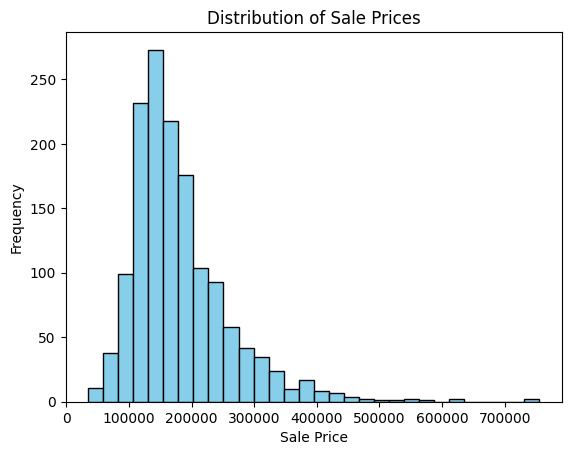

주택가격의 분포를 나타낸 히스토그램이 위에 표시되었습니다.

> Finished chain.


In [6]:
response = agent_executor.invoke('주택가격 분포를 히스토그램으로 나타내주세요.')

In [7]:
response

{'input': '주택가격 분포를 히스토그램으로 나타내주세요.',
 'output': '위의 히스토그램은 주택 가격의 분포를 나타내는 것입니다. 주택 가격이 x축에 있고 빈도수가 y축에 있습니다. 데이터셋에 따라 분포가 다를 수 있지만, 이 그래프를 통해 대략적인 주택 가격의 분포를 확인할 수 있습니다.'}

In [7]:
llm = ChatOpenAI(model='gpt-4o-mini', temperature=0)

agent_executor = create_pandas_dataframe_agent(
    llm,
    train,
    agent_type="openai-tools",
    verbose=True,
    return_intermediate_steps=True,
    allow_dangerous_code=True
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}`




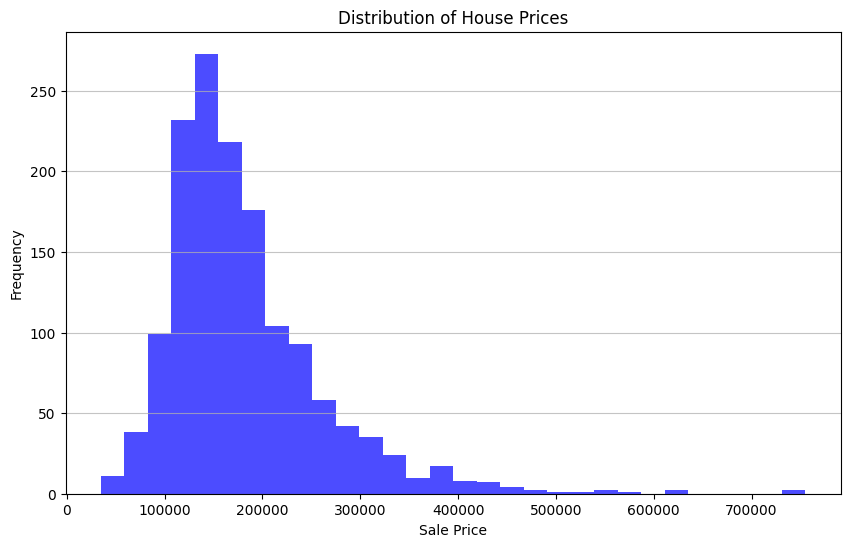

주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 보여주며, 가격대별로 주택의 수를 시각적으로 확인할 수 있습니다.

> Finished chain.


In [8]:
response = agent_executor.invoke('주택가격 분포를 히스토그램으로 나타내주세요.')

In [9]:
response

{'input': '주택가격 분포를 히스토그램으로 나타내주세요.',
 'output': '주택가격(SalePrice)의 분포를 히스토그램으로 나타냈습니다. 히스토그램은 주택가격의 빈도수를 보여주며, 가격대별로 주택의 수를 시각적으로 확인할 수 있습니다.',
 'intermediate_steps': [(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsize=(10, 6))\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'blue\', alpha=0.7)\\nplt.title(\'Distribution of House Prices\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.grid(axis=\'y\', alpha=0.75)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 

In [10]:
intermediate_actions = response['intermediate_steps']
print(intermediate_actions)
print(len(intermediate_actions))

[(ToolAgentAction(tool='python_repl_ast', tool_input={'query': "import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"}, log='\nInvoking: `python_repl_ast` with `{\'query\': "import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(figsize=(10, 6))\\nplt.hist(df[\'SalePrice\'], bins=30, color=\'blue\', alpha=0.7)\\nplt.title(\'Distribution of House Prices\')\\nplt.xlabel(\'Sale Price\')\\nplt.ylabel(\'Frequency\')\\nplt.grid(axis=\'y\', alpha=0.75)\\nplt.show()"}`\n\n\n', message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_hiMrcyGPkG6jq2vyoZVpYWPc', 'function': {'arguments': '{"query":"import matplotlib.pyplot as plt\\n\\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\\nplt.figure(fig

In [11]:
intermediate_actions[0][0].tool_input['query']

"import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"

In [12]:
python_code = response['intermediate_steps'][0][0].tool_input['query']
python_code

"import matplotlib.pyplot as plt\n\n# 주택가격(SalePrice) 분포를 히스토그램으로 나타내기\nplt.figure(figsize=(10, 6))\nplt.hist(df['SalePrice'], bins=30, color='blue', alpha=0.7)\nplt.title('Distribution of House Prices')\nplt.xlabel('Sale Price')\nplt.ylabel('Frequency')\nplt.grid(axis='y', alpha=0.75)\nplt.show()"

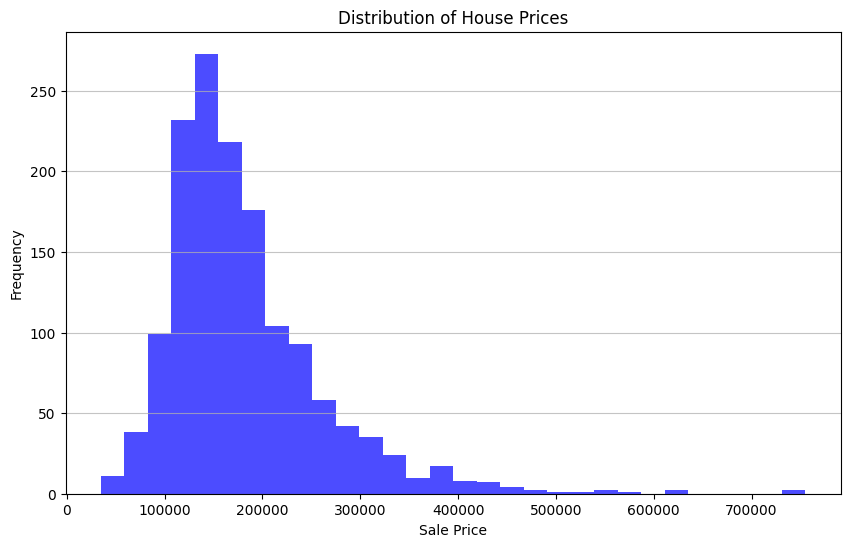

In [13]:
df = train.copy()

exec(python_code)